# **Contours**
    
1. Using findContours
2. Drawing Contours
3. Hierachy of Contours
4. Contouring Modes (Simple vs Approx) 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
def cv_imshow(title="Image", image = None, size=10):
    w, h = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **What are Contours?**
Contours are continous lines or curves that bound or cover the full boundary of an object.

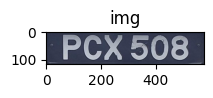

In [10]:
img = cv2.imread("../data/images/LP.jpg")
cv_imshow("img", img)

#### **Applying cv2.findContours()**

```cv2.findContours(image, Retrieval Mode, Approximation Method)```

**Retrieval Modes**
- **RETR_LIST** - Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.
- **RETR_EXTERNAL** - returns only extreme outer flags. All child contours are left behind.
- **RETR_CCOMP** - This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.
- **RETR_TREE** -  It retrieves all the contours and creates a full family hierarchy list. 

**Approximation Method Options**
- cv2.CHAIN_APPROX_NONE – Stores all the points along the line(inefficient!)
- cv2.CHAIN_APPROX_SIMPLE – Stores the end points of each line


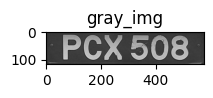

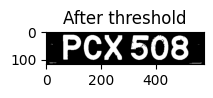

(117.0, None)

In [33]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv_imshow("gray_img", gray_img)

_, th2 = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, cv_imshow("After threshold",th2)

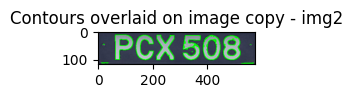

Number of Contours found = 38


In [35]:
# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hirarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# contours, hirarchy = cv2.findContours(gray_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

img2 = img.copy()
# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(img2,contours, -1, (0, 255, 0), thickness = 2)
cv_imshow("Contours overlaid on image copy - img2", img2)

print("Number of Contours found = " + str(len(contours)))

#### **What happens if we don't threshold? Bad things..**

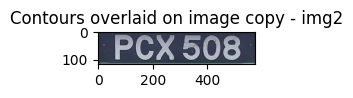

Number of Contours found = 1


In [37]:
# Finding Contours

contours, hirarchy = cv2.findContours(gray_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

img3 = img.copy()
# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(img3, contours, -1, (0, 255, 0), thickness = 2)
cv_imshow("Contours overlaid on image copy - img2", img3)

print("Number of Contours found = " + str(len(contours)))

#### **NOTE: For findContours to work, the background has to be black and foreground (i.e. the text or objects)** 

#### Otherwise you'll need to invert the image by using **cv2..bitwise_not(input_image)**